In [41]:
import numpy as np
import pandas as pd
from os.path import join
import os
from pylab import rcParams
import matplotlib.pyplot as plt

import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation, FHMM, Hart85
from nilmtk.utils import print_dict
from nilmtk.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

In [42]:
import sys

In [53]:
sys.path.append("../common")
sys.path.append("../../common")
sys.path.append("../../../common")



%matplotlib inline

In [55]:
sys.path.append("../../code/common")

In [45]:
ds = DataSet("/Users/nipunbatra/Downloads/wikienergy-2.h5")
fridges = nilmtk.global_meter_group.select_using_appliances(type='fridge')

In [46]:
paths = {"Hart": "../../data/fridge/N2_K3_Hart_usage_defrost_cycles.csv",
        "CO":"../../data/fridge/N2_K3_CO_usage_defrost_cycles.csv",
        "FHMM":"../../data/fridge/N2_K3_FHMM_usage_defrost_cycles.csv",
        "Submetered":"../../data/fridge/usage_defrost_cycles.csv"}

In [47]:

dfs = {}
for algo, algo_csv in paths.iteritems():
    dfs[algo] = pd.read_csv(algo_csv)
    dfs[algo].index = dfs[algo].home
    dfs[algo] = dfs[algo].dropna()
ix = dfs["Submetered"].index

for algo, algo_df in dfs.iteritems():
    ix = algo_df.index.intersection(ix)

baseline_percent = {}
num_usage_cycles = {}
for algo, algo_df in dfs.iteritems():
    baseline_percent[algo] = algo_df.ix[ix]["baseline_duty_percent"]
    num_usage_cycles[algo] = algo_df.ix[ix]["usage_cycles"]

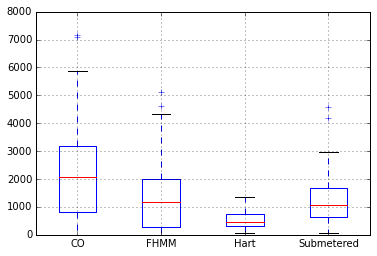

In [48]:
pd.DataFrame(num_usage_cycles).boxplot();

In [56]:
from common_functions import latexify, format_axes

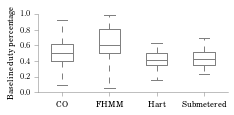

In [63]:
latexify(fig_height=1.4)
ax = pd.DataFrame(baseline_percent).plot(kind="box", color="gray",sym='');
format_axes(plt.gca())
plt.ylabel("Baseline duty percentage")
plt.grid(False)
plt.savefig("/Users/nipunbatra/git/nilm-actionable/figures/fridge/baseline_duty_percent.pdf", bbox_inches="tight")


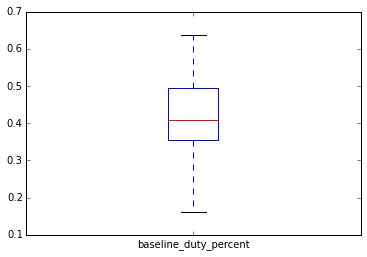

In [16]:
df.baseline_duty_percent.plot(kind="box")